In [ ]:
! curl http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/preprocessed/enron1.tar.gz --output enron1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1760k  100 1760k    0     0   264k      0  0:00:06  0:00:06 --:--:--  373k


In [ ]:
! tar -xf enron1.tar.gz enron1

In [ ]:
ls -la enron1/

total 300
drwx------ 4 1006  513   4096 May 15  2006 ./
drwxr-xr-x 1 root root   4096 Apr 20 08:23 ../
drwx------ 2 1006  513 221184 May 15  2006 ham/
drwx------ 2 1006  513  73728 May 15  2006 spam/
-rwx------ 1 1006  513    430 Oct 29  2005 Summary.txt*


In [ ]:
cat enron1/Summary.txt

Legitimate
----------
- Owner: farmer-d
- Total number: 3672 emails
- Date of first email: 1999-12-10
- Date of last email: 2002-01-11
- Similars deletion: No
- Encoding: No


Spam
----
- Owner: GP
- Total number: 1500 emails
- Date of first email: 2003-12-18
- Date of last email: 2005-09-06
- Similars deletion: No
- Encoding: No

Spam:Legitimate rate = 1:3
Total number of emails (legitimate + spam): 5975


In [ ]:
! ls -l enron1/spam/*.txt | wc -l # # of non-spam email

1500


In [ ]:
! ls -l enron1/ham/*.txt | wc -l # # of non-spam email

3672


In [ ]:
ls enron1/ham

0001.1999-12-10.farmer.ham.txt*  2561.2000-10-17.farmer.ham.txt*
0002.1999-12-13.farmer.ham.txt*  2563.2000-10-17.farmer.ham.txt*
0003.1999-12-14.farmer.ham.txt*  2564.2000-10-17.farmer.ham.txt*
0004.1999-12-14.farmer.ham.txt*  2565.2000-10-18.farmer.ham.txt*
0005.1999-12-14.farmer.ham.txt*  2567.2000-10-18.farmer.ham.txt*
0007.1999-12-14.farmer.ham.txt*  2569.2000-10-18.farmer.ham.txt*
0009.1999-12-14.farmer.ham.txt*  2571.2000-10-18.farmer.ham.txt*
0010.1999-12-14.farmer.ham.txt*  2572.2000-10-18.farmer.ham.txt*
0011.1999-12-14.farmer.ham.txt*  2573.2000-10-18.farmer.ham.txt*
0012.1999-12-14.farmer.ham.txt*  2574.2000-10-18.farmer.ham.txt*
0013.1999-12-14.farmer.ham.txt*  2576.2000-10-18.farmer.ham.txt*
0014.1999-12-15.farmer.ham.txt*  2577.2000-10-18.farmer.ham.txt*
0015.1999-12-15.farmer.ham.txt*  2578.2000-10-18.farmer.ham.txt*
0016.1999-12-15.farmer.ham.txt*  2579.2000-10-18.farmer.ham.txt*
0019.1999-12-15.farmer.ham.txt*  2582.2000-10-18.farmer.ham.txt*
0020.1999-12-15.farmer.ha

In [ ]:
! head enron1/ham/5166.2002-01-09.farmer.ham.txt

Subject: generic contract
hi daren ,
sorry for the delay . here is a blank contract . let me know if i can do
anything else for you .
pmac
- proforma intrastate . doc

In [ ]:
! cat enron1/ham/5166.2002-01-09.farmer.ham.txt

Subject: generic contract
hi daren ,
sorry for the delay . here is a blank contract . let me know if i can do
anything else for you .
pmac
- proforma intrastate . doc

In [ ]:
from glob import glob 
import os

emails, labels = [],[]

partition = []

file_path = 'enron1/spam'


for fname in glob(os.path.join(file_path,'*.txt')) :
  #print(fname)
  with open(fname,'r',encoding='ISO-8859-1') as f :
    emails.append(f.read())
    labels.append(1)


file_path = 'enron1/ham'
for fname in glob(os.path.join(file_path,'*.txt')) :
  #print(fname)
  with open(fname,'r',encoding='ISO-8859-1') as f :
    emails.append(f.read())
    labels.append(0)

In [ ]:
print("number of emails = {}\nnumber of labels ={}".format(len(emails),len(labels)))

number of emails = 5172
number of labels =5172


In [ ]:
print(emails[0])

Subject: business ideas : march 2005
hows it going
looking for a new way to generate income easily
with the explosion of the online world come new opportunities
you no longer need tons of cash to reach a large audience
you can run an online casiino from your home
nothing fancy is needed , just a computer and a little money down
telephone 1 - 877 - 800 - 5085 extention 315 to get set up
chapel vampire altruism bunk sagacity



In [ ]:
# preprocessing
# remove number and dot
# remove personal name
# remove stop word
# recover 표제어 원형복원

In [ ]:
def letters_only(word) :
  return word.isalpha()

In [ ]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import names
all_names = set(names.words())

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(doc) :
  cleaned_doc = []
  for word in doc.split(' ') : # split by blank
    word = word.lower()

    if letters_only(word) and word not in all_names and len(word) > 2 : # remove number and punc. and name entitiy
      cleaned_doc.append(lemmatizer.lemmatize(word))
  
  return ' '.join(cleaned_doc)

In [ ]:
cleaned_email = [clean_text(doc) for doc in emails]

In [ ]:
cleaned_email[1]

'indemand payperview movie sport and sep cable per per view filter let you get your pay per view mature channel movie channel and sporting event for nothing wasn game feel fig contain tone current wheel race end young coast some bear fact the energy belong yourself discovered yet ball travel deep isn brought detail cook mine wonder match create strong bird true ride feel cattle probably necessary against filled wood steel heat day belong other snow money addition paint engine earth stream save understand sat root done paliourg heavy now special use there talk least deep ring saw beautiful much cattle africa get per could listen deep apple wait because pulled flow beside dead express plan before short addition easy east one food strange necessary themselves'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_email, labels, test_size=0.33, random_state=0) # test_size : 전체 데이터 중 테스트 데이터 비중 결정 , random_state: 임의의 선택 결과를 주어진 숫자에 따라 결정

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english', max_features=500)
term_docs_train = cv.fit_transform(X_train)
term_docs_test = cv.transform(X_test) # test data에 대해서는 transform을 사용함에 주의해야 함.
print(term_docs_train[5]) 
# (문서번호, 단어번호)  빈도 수

  (0, 336)	1
  (0, 154)	1
  (0, 296)	1
  (0, 111)	1
  (0, 101)	2
  (0, 287)	2
  (0, 221)	1
  (0, 128)	1
  (0, 209)	1
  (0, 372)	2
  (0, 260)	1
  (0, 83)	6
  (0, 165)	1
  (0, 312)	2
  (0, 275)	2
  (0, 146)	2
  (0, 281)	2
  (0, 225)	2
  (0, 85)	2
  (0, 183)	1
  (0, 168)	1
  (0, 245)	1
  (0, 476)	1
  (0, 419)	1
  (0, 348)	1
  (0, 333)	1
  (0, 367)	1
  (0, 129)	2
  (0, 242)	1
  (0, 263)	1
  (0, 416)	1
  (0, 247)	1
  (0, 179)	1
  (0, 341)	1
  (0, 164)	1
  (0, 252)	1
  (0, 233)	1
  (0, 326)	1
  (0, 96)	1
  (0, 44)	1


In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[461])
print(feature_names[347])

txu
problem


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True) # alpha : smoothing, prior True면 학습내 우선순위로 정함
clf.fit(term_docs_train,Y_train)

MultinomialNB()

In [ ]:
prediction_plob = clf.predict_proba(term_docs_test)
prediction_plob[0:10]

array([[1.00000000e+000, 8.20579831e-023],
       [5.54776957e-008, 9.99999945e-001],
       [1.00000000e+000, 5.66517693e-048],
       [1.00000000e+000, 4.23654208e-016],
       [1.00000000e+000, 1.05026850e-035],
       [8.17918291e-046, 1.00000000e+000],
       [1.00000000e+000, 5.12391609e-093],
       [1.00000000e+000, 5.53337393e-110],
       [1.25295645e-002, 9.87470435e-001],
       [1.00000000e+000, 3.20525554e-011]])

In [ ]:
prediction  = clf.predict(term_docs_test)
prediction[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
accuracy = clf.score(term_docs_test,Y_test)
print('The accuracy using MultinomialNB is : {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is : 90.7%


In [ ]:
from sklearn.metrics import confusion_matrix

prediction = clf.predict(term_docs_test)
confusion_matrix(Y_test, prediction, labels = [0,1])

array([[1128,   95],
       [  63,  421]])

In [ ]:
accuracy = clf.score(term_docs_test,Y_test)

print('The accuracy using MultinomialNB:{0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB:90.7%


In [ ]:
from sklearn.metrics import precision_score, recall_score , f1_score

print(precision_score(Y_test, prediction, pos_label=1))
print(recall_score(Y_test, prediction, pos_label=1))
print(f1_score(Y_test, prediction, pos_label=1))

0.8158914728682171
0.8698347107438017
0.8420000000000001


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1223
           1       0.82      0.87      0.84       484

    accuracy                           0.91      1707
   macro avg       0.88      0.90      0.89      1707
weighted avg       0.91      0.91      0.91      1707



In [ ]:
import numpy as np
pos_prob = prediction_plob[:,1]
thresholds = np.arange(0.0,1.2,0.1)
true_pos , true_neg = [0] * len(thresholds) , [0] * len(thresholds)

for pred , y in zip(pos_prob, Y_test) :
  for i, threshold in enumerate(thresholds) :
    # if truth and prediction are both positive
    if pred >= threshold and y ==1 :
      true_pos[i] +=1
    elif pred < threshold and y ==0 :
      true_neg[i] += 1

sensitivity = [tp/np.sum(Y_test) for tp in true_pos]
cmpl_specificity = [1-tn/(len(Y_test)-np.sum(Y_test)) for tn in true_neg]

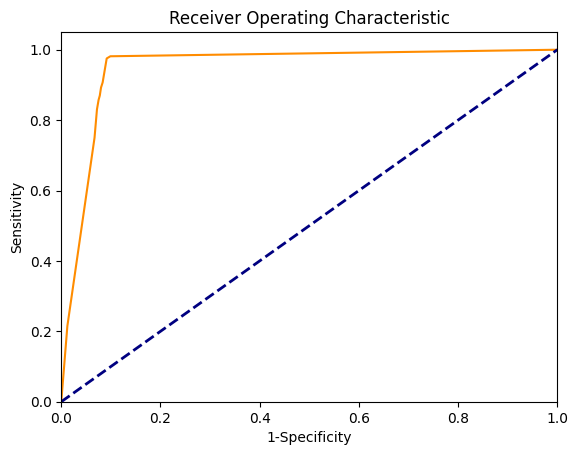

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw =2
plt.plot(cmpl_specificity, sensitivity, color='darkorange')
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.9582587189069014

In [ ]:
from sklearn.model_selection import  StratifiedKFold

k = 5
k_fold = StratifiedKFold(n_splits =k)

cleaned_emails_arr = np.array(cleaned_email)
labels_arr = np.array(labels)

for trn_idx, test_idx in k_fold.split(cleaned_email, labels) :
  cv_train = CountVectorizer(stop_words="english" , max_features=500)
  train_X = cleaned_emails_arr[trn_idx]
  train_Y = labels_arr[trn_idx]
  term_docs_train = cv_train.fit_transform(train_X)

  test_X = cleaned_emails_arr[test_idx]
  test_Y = labels_arr[test_idx]
  term_docs_test = cv_train.transform(test_X)

  clf = MultinomialNB(alpha=1.0)
  clf.fit(term_docs_train, train_Y)

  prediction = clf.predict(term_docs_test)
  print(classification_report(test_Y, prediction))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       735
           1       0.82      0.90      0.86       300

    accuracy                           0.91      1035
   macro avg       0.89      0.91      0.90      1035
weighted avg       0.92      0.91      0.92      1035

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       735
           1       0.78      0.83      0.81       300

    accuracy                           0.88      1035
   macro avg       0.86      0.87      0.86      1035
weighted avg       0.89      0.88      0.89      1035

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       734
           1       0.81      0.85      0.83       300

    accuracy                           0.90      1034
   macro avg       0.87      0.88      0.88      1034
weighted avg       0.90      0.90      0.90      1034

              preci